In [8]:
!nvidia-smi

Thu Nov 20 13:42:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     Off |   00000000:01:00.0  On |                  N/A |
|  0%   50C    P3             41W /  225W |    2063MiB /   8192MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
import os
HOME = os.getcwd()
KITTI_PATH = f"{HOME}/refer-kitti/KITTI/training/image_02/"
print(HOME)

/home/seanachan/ByteTrack_ultralytics


# Download Data

In [ ]:
!gdown -O "0005.zip" "https://drive.google.com/uc?id=1aJx81SILqLSjLzyLUUcLntDxWl2JDSSW"
!unzip "/content/0005.zip"

# Use Ultralytics

In [10]:
! pip install -q ultralytics utils


In [160]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>


image 1/1 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0011/000211.png: 224x640 2 persons, 11 cars, 3.7ms
Speed: 0.7ms preprocess, 3.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
2
tensor([[9.2368e+02, 1.6690e+02, 1.2420e+03, 3.6553e+02],
        [1.0133e+02, 1.8852e+02, 2.7190e+02, 2.5547e+02],
        [5.7616e+02, 1.7583e+02, 7.1805e+02, 3.0621e+02],
        [4.3308e-01, 1.8498e+02, 9.2339e+01, 2.8090e+02],
        [3.5881e+02, 1.8136e+02, 3.8626e+02, 2.5715e+02],
        [7.0813e+02, 1.7374e+02, 8.0997e+02, 2.2289e+02],
        [2.6463e+02, 1.7742e+02, 3.2002e+02, 2.1208e+02],
        [4.1073e+02, 1.7955e+02, 4.4127e+02, 2.1031e+02],
        [3.6008e+02, 1.8128e+02, 3.8587e+02, 2.3710e+02],
        [4.5984e+02, 1.7685e+02, 4.9107e+02, 1.9785e+02],
        [3.8771e+02, 1.8036e+02, 4.3181e+02, 2.1285e+02],
        [3.8335e+02, 1.8123e+02, 4.2082e+02, 2.1356e+02],
        [4.3205e+02, 1.8066e+02, 4.5759e+02, 2.0767e+02]], device='cud

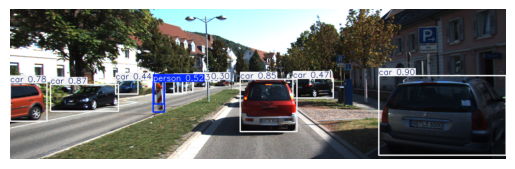

In [184]:
# Load a model
model = YOLO("yolo11n.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
# results = model("/content/0006/000000.png")  # predict on an image
results = model(f"{KITTI_PATH}/0011/000211.png")  # predict on an image on local disk

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(int(result.boxes[0].cls[0]))

    img = result.plot()
    plt.imshow(img[..., ::-1])
    plt.axis('off')
    print(xyxy)

# Testing 

In [27]:
model = YOLO("yolo11n.pt")
results = model.track(source=f"{KITTI_PATH}/0005", tracker="bytetrack.yaml",persist=True)


image 1/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000000.png: 224x640 3 cars, 4.4ms
image 2/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000001.png: 224x640 3 cars, 2.8ms
image 3/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000002.png: 224x640 2 cars, 3.2ms
image 4/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000003.png: 224x640 2 cars, 3.0ms
image 5/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000004.png: 224x640 3 cars, 3.5ms
image 6/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000005.png: 224x640 3 cars, 2.9ms
image 7/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000006.png: 224x640 3 cars, 3.0ms
image 8/297 /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005/000007.png: 224x640 3 cars, 3.2ms

In [28]:
if results:
    # Access the Results object for the first frame
    first_frame_results = results[0]

    # Check if there are any detected boxes in the first frame
    if first_frame_results.boxes is not None:
        print("Detections and Tracks for the First Frame:")
        for box in first_frame_results.boxes:
            # Bounding box coordinates (xyxy format)
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            print("id: ",box.id[0])

            # Class ID and Name
            class_id = int(box.cls[0].cpu().numpy())
            class_name = first_frame_results.names[class_id]

            # Confidence Score
            confidence = float(box.conf[0].cpu().numpy())

            # Tracker ID (important for tracking results)
            tracker_id = int(box.id[0].cpu().numpy()) if box.id is not None else "N/A"

            print(f"  Object ID: {tracker_id}, Class: {class_name} (ID: {class_id}), Confidence: {confidence:.2f}, BBox: [{x1}, {y1}, {x2}, {y2}]")
    else:
        print("No detections in the first frame.")
else:
    print("No results found. Ensure model.track() was executed successfully.")

Detections and Tracks for the First Frame:
id:  tensor(1.)
  Object ID: 1, Class: car (ID: 2), Confidence: 0.63, BBox: [254, 175, 302, 201]
id:  tensor(2.)
  Object ID: 2, Class: car (ID: 2), Confidence: 0.54, BBox: [569, 171, 609, 207]
id:  tensor(3.)
  Object ID: 3, Class: car (ID: 2), Confidence: 0.37, BBox: [321, 178, 351, 196]


# Start 

## Helper Functions and Class
- `write_gt()`
- `save_crops_from_detections()`
- `inference()`
- `Crop_Img`

In [29]:
import os, json, cv2
import shutil
from LLM import select_targets
from tqdm import tqdm
from dataclasses import dataclass
import json

In [170]:
@dataclass
class Crop_Img:
    frame_id: int
    tracker_id: int
    bbox: dict  # {'x1': ..., 'y1': ..., 'x2': ..., 'y2': ...}
    width: int
    height: int
    crop_path: str
    cls: int
    
    @property
    def x1(self):
        return self.bbox.get('x1', 0)
    
    @property
    def y1(self):
        return self.bbox.get('y1', 0)
    
    @property
    def x2(self):
        return self.bbox.get('x2', 0)
    
    @property
    def y2(self):
        return self.bbox.get('y2', 0)
    # @property
    # def cls(self):
    #     return self.bbox.get('cls', 0)
    def get_class(self, cls):
            if cls==0:
                return "person"
            elif cls==1:
                return "bicycle"
            elif cls==2:
                return "car"
            elif cls==3:      
                return "motorcycle"
            elif cls==5:
                return "bus"
            elif cls==7:
                return "truck"
            else:
                return "unknown"

In [206]:
def adjust_bbox(x1, y1, x2, y2, img_w, img_h, min_w=50, min_h=100):
    w = x2 - x1
    h = y2 - y1
    cx = x1 + w / 2
    cy = y1 + h / 2 

    new_w = max(w, min_w)
    new_h = max(h, min_h)

    new_x1 = cx - new_w / 2
    new_x2 = cx + new_w / 2
    new_y1 = cy - new_h / 2
    new_y2 = cy + new_h / 2 

    new_x1 = max(0, new_x1)
    new_y1 = max(0, new_y1)
    new_x2 = min(img_w, new_x2)
    new_y2 = min(img_h, new_y2)

    # Horizontal adjustments
    if new_x1 < 0: 
        # Too far left? Snap start to 0, end to min_w
        new_x1 = 0
        new_x2 = new_w
    elif new_x2 > img_w:
        # Too far right? Snap end to img_w, start to img_w - new_w
        new_x2 = img_w
        new_x1 = img_w - new_w

    # Vertical adjustments
    if new_y1 < 0:
        new_y1 = 0
        new_y2 = new_h
    elif new_y2 > img_h:
        new_y2 = img_h
        new_y1 = img_h - new_h
    return new_x1, new_y1, new_x2, new_y2

In [207]:

def save_crops_from_detections(box, frame_id, crops_dir, video_id):
  """Save cropped images of detected objects for LLM analysis."""
  ORI_PATH = f"{HOME}/refer-kitti/KITTI/training/image_02/{video_id}"
  img_path = os.path.join(ORI_PATH, f"{frame_id-1:06d}.png")
  img = cv2.imread(img_path)
  min_w, min_h = 50, 100 
  seq_h, seq_w, _ = img.shape

  os.makedirs(crops_dir, exist_ok=True)
  crop = None
  if box :
    x1, y1, x2, y2 = list(map(int, box.xyxy[0]))
    new_x1, new_y1, new_x2, new_y2 = adjust_bbox(x1, y1, x2, y2, seq_w, seq_h, min_w, min_h)
      
    crop = img[new_y1:new_y2, new_x1:new_x2]
  if crop is not None and crop.size > 0 and box.id is not None:  # Make sure crop is valid
      save_path = os.path.join(crops_dir, f"i{int(box.id[0])}_f{frame_id}.jpg")
      cv2.imwrite(save_path, crop)

In [166]:
def write_gt(gt_path, save_path, expression_path, labels_path, video_id, expression):
  save_format = "{frame},{id},{x1},{y1},{w},{h},1, 1, 1\n"

  with open(os.path.join(expression_path, video_id, expression+".json")) as f:
      json_info = json.load(f)

  # FIX: Get image dimensions from the first available frame
  ORI_PATH = f"{HOME}/refer-kitti/KITTI/training/image_02/{video_id}"
  first_frame_id = int(list(json_info["label"].keys())[0])
  img_path = os.path.join(ORI_PATH, f"{first_frame_id:06d}.png")
  img = cv2.imread(img_path)
  seq_h, seq_w, _ = img.shape

  labels_path = os.path.join(labels_path, video_id)
  if(not os.path.exists(os.path.join(save_path,video_id,expression)) ):
    os.mkdir(os.path.join(save_path,video_id,expression))
#   print(f"json_info:{json_info}")
  with open(os.path.join(save_path, video_id, expression, "gt.txt"), "w") as f:
      for k in json_info["label"].keys():
          frame_id = int(k)
          if not os.path.isfile(
              os.path.join(labels_path, "{:06d}.txt".format(frame_id))
          ):
              continue
          frame_gt = np.loadtxt(
              os.path.join(labels_path, "{:06d}.txt".format(frame_id))
          ).reshape(-1, 6)
          for frame_gt_line in frame_gt:
              aa = json_info["label"][k]  # all gt from frame
              aa = [int(a) for a in aa]
              if int(frame_gt_line[1]) in aa:  # choose referent gt from all gt
                  track_id = int(frame_gt_line[1])
                  x1, y1, w, h = frame_gt_line[2:6]  # KITTI -> [x1, y1, w, h]
                  line = save_format.format(
                      frame=frame_id + 1,
                      id=track_id,
                      x1=x1 * seq_w,
                      y1=y1 * seq_h,
                      w=w * seq_w,
                      h=h * seq_h,
                  )
                  f.write(line)

  print("save gt to {}".format(os.path.join(save_path, video_id, expression, "gt.txt")))
        



In [ ]:

def inference(EXP_PATH, EXPRESSION_PATH, seq, results, video_id):
    SEQ_PATH = os.path.join(EXPRESSION_PATH, seq[0], seq[1])
    save_format = "{frame},{id},{x1},{y1},{w},{h},1,1,1\n"
    with open(SEQ_PATH, "r", encoding="utf-8") as f:
        prompt = json.load(f)
        sentence = prompt.get("sentence", "")

    expression_str = seq[1].split(".")[0]
    exp_dir = os.path.join(EXP_PATH, seq[0], expression_str)
    os.makedirs(exp_dir, exist_ok=True)
    predict_path = os.path.join(exp_dir, "predict.txt")

    os.makedirs("crops/", exist_ok=True)

    first_frame_path = os.path.join(KITTI_PATH, seq[0], f"{1:06d}.png")
    img = cv2.imread(first_frame_path)
    seq_h, seq_w = img.shape[:2]
    existing_ids = set()  # To keep track of existing tracker IDs

    with open(predict_path, "w") as fout:
      for frame_idx, result in enumerate(tqdm(results), start=1):
        crop_imgs = []
        

        for box in result.boxes:

          # save crops for this frame
          save_crops_from_detections(box, frame_idx, "crops/", video_id)
          # print(list(map(int, box.xyxy[0])))
          # Record bounding box position
          x1, y1, x2, y2 = list(map(float, box.xyxy[0]))
          tracker_id = int(box.id[0]) if box.id is not None else -1

          # Create Crop_Img object using the defined class
          crop_img_obj = Crop_Img(
            frame_id=frame_idx,
            tracker_id=tracker_id,
            bbox={"x1": x1, "y1": y1, "x2": x2, "y2": y2},
            width=x2 - x1,
            height=y2 - y1,
            crop_path=os.path.join(
              "crops/", f"i{tracker_id}_f{frame_idx}.jpg"
            ),
            cls=box.cls[0]
          )
          crop_imgs.append(crop_img_obj)

        # Call select_targets on first frame, every 30 frames, or when new IDs appear
          current_ids = {int(crop_img.tracker_id) for crop_img in crop_imgs}
          new_ids = current_ids - existing_ids
          
          if (frame_idx == 1) or (frame_idx % 11 == 0): #or (new_ids and crop_imgs):
            matches = select_targets(
              crops_dir="crops/",
              prompt=sentence,
              quiet=False,
              img_size={"img_h": seq_h, "img_w": seq_w},
              crop_info=crop_imgs  # Pass list of Crop_Img objects
            )
            existing_ids.update(matches)  # Update existing IDs with matches
          else:
            matches = existing_ids # Keep track of existing IDs
        # Clean up crops directory
        if os.path.exists("crops/"):
          shutil.rmtree("crops/")
        os.makedirs("crops/", exist_ok=True)

        # Write predictions for matched objects with actual bounding boxes
        for crop_img in crop_imgs:
          if crop_img.tracker_id in matches:
            x1 = crop_img.bbox['x1']
            y1 = crop_img.bbox['y1']
            w = crop_img.width
            h = crop_img.height
            
            line = save_format.format(
              frame=frame_idx,
              id=crop_img.tracker_id,
              x1=x1,
              y1=y1,
              w=w,
              h=h
            )
            # print(f"Frame {frame_idx}, ID {crop_img.tracker_id}: x1={x1}, y1={y1}, w={w}, h={h}")
            fout.write(line)

## Implementation Detail
when modifying LLM.py, this notebook might not refresh as hoped.

This cell help refresh the import.

In [ ]:

# Reload LLM module to get latest changes
import importlib
import LLM
importlib.reload(LLM)
from LLM import select_targets

this is main executing cell.

In [ ]:
! cd {HOME}
result_num = 1
EXPRESSION_PATH = os.path.join(HOME, f"refer-kitti/expression/") 
GT_PATH = os.path.join(HOME, f"refer-kitti/KITTI/labels_with_ids/image_02/")
EXP_PATH = os.path.join(HOME, f"exps/results_{result_num}/")
LABELS_PATH = os.path.join(HOME, f"refer-kitti/KITTI/labels_with_ids/image_02/")

EXP_NUM = "0005"
images_dir = os.path.join(KITTI_PATH, EXP_NUM)
sequence_id = os.path.basename(images_dir.rstrip("/"))
expression_dir = os.path.join(KITTI_PATH, EXP_NUM)
sentence = ""
if "refer-kitti-v2" in EXPRESSION_PATH:
    video_ids = ["0005", "0011", "0013", "0019"]
else:
    video_ids = ["0005", "0011", "0013"]

for video_id in video_ids[1:2]:
    # Uncommnent if full evaluation.
    # model = YOLO("yolo11n.pt")
    # results = model.track(source=f"{KITTI_PATH}/{video_id}", tracker="bytetrack.yaml",persist=True, classes=[0, 2, 3, 5, 7 ])

    expression_jsons = sorted(os.listdir(os.path.join(EXPRESSION_PATH, video_id)))

    # print(f"Available expressions: {len(expression_jsons)} files")
    # # Select only the first JSON file instead of all
    expression_jsons = [expression_jsons[35]] # adjust the index to select different expressions
    print(f"Selected expression: {expression_jsons[0]}")
    
    seq_nums = []
    print(expression_jsons)
    for expression_json in expression_jsons:
        seq_nums.append([video_id, expression_json])
    
    for seq_num in seq_nums:
        write_gt(GT_PATH, EXP_PATH, EXPRESSION_PATH, LABELS_PATH, seq_num[0], seq_num[1].split(".")[0])
        inference(EXP_PATH, EXPRESSION_PATH, seq_num, results,video_id)
        
# print(seq_nums[:3])
# expression_num = len(seq_nums)
# print(expression_num)

Available expressions: 64 files
Selected expression: pedestrian.json
['pedestrian.json']
save gt to /home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/gt.txt


100%|██████████| 297/297 [08:01<00:00,  1.62s/it]


Available expressions: 44 files
Selected expression: walking-males.json
['walking-males.json']
save gt to /home/seanachan/ByteTrack_ultralytics/exps/results_1/0013/walking-males/gt.txt


 77%|███████▋  | 230/297 [05:48<01:41,  1.52s/it]


KeyboardInterrupt: 

## Create output directory
Create a directory to store the annotated frames and the final video.


In [143]:
import os

output_dir = os.path.join(HOME, "tracking_output")
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory created at: {output_dir}")

Output directory created at: /home/seanachan/ByteTrack_ultralytics/tracking_output


Save the output video frames geneated by original YOLO

In [ ]:
for i, result in enumerate(results):
    # Save the annotated image to the output directory
    image_path = os.path.join(output_dir, f"frame_{i:04d}.jpg") # Using JPG for smaller size
    result.save(filename=image_path)
    if i % 50 == 0:
        print(f"Saved frame {i} to {image_path}")
print(f"All annotated frames saved to {output_dir}")

This is generating video using `predict.txt` generated by inference()

In [112]:
import cv2
import glob

# Get a list of all saved image files, sorted by name to ensure correct frame order
image_files = sorted(glob.glob(os.path.join(output_dir, "frame_*.jpg")))

if not image_files:
    print("No frames found to create video.")
else:
    # Read the first image to get dimensions
    first_frame = cv2.imread(image_files[0])
    height, width, layers = first_frame.shape
    size = (width, height)

    # Define the codec and create VideoWriter object
    video_name = os.path.join(output_dir, 'tracking_output.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # You can choose other codecs like 'MJPG', 'XVID', 'mp4v'
    fps = 10 # Frames per second
    out = cv2.VideoWriter(video_name, fourcc, fps, size)

    # Write each frame to the video file
    for img_file in image_files:
        img = cv2.imread(img_file)
        out.write(img)

    out.release()
    print(f"Video created successfully at: {video_name}")

Video created successfully at: /home/seanachan/ByteTrack_ultralytics/tracking_output/tracking_output.mp4


# Predict videos Generation
By adjusting the `expression` and `EXP_NUM`, it can generate the gt videos in tracking_viz/.

Run draw_boxes.py from the notebook cell


In [201]:
import os, subprocess, shlex

EXP_NUM="0011"
expression = "pedestrian"
images_dir = os.path.join(KITTI_PATH, EXP_NUM)
predict_file = os.path.join(EXP_PATH, EXP_NUM, expression, "predict.txt")

# Try to check if the gt file exists and print a few lines
try:
    if os.path.exists(predict_file):
        print(f"GT file exists: {predict_file}")
        with open(predict_file, 'r') as f:
            lines = f.readlines()[:5]
            print(f"First 5 lines of GT file:")
            for line in lines:
                print(line.strip())
    else:
        print(f"GT file does NOT exist: {predict_file}")
except Exception as e:
    print(f"Error while reading GT file: {e}")

print(f"\nImages directory: {images_dir}")
print(f"Output directory: tracking_viz/predict_viz")

cmd = f'python draw_boxes.py --gt_file "{predict_file}" --images_dir "{images_dir}" --output_dir tracking_viz/predict_viz'
print(f"\nRunning: {cmd}")
proc = subprocess.run(shlex.split(cmd), capture_output=True, text=True)
print(proc.stdout)
if proc.returncode != 0:
    print("Return code:", proc.returncode)
    print(proc.stderr)

GT file exists: /home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/predict.txt
First 5 lines of GT file:

Images directory: /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0011
Output directory: tracking_viz/predict_viz

Running: python draw_boxes.py --gt_file "/home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/predict.txt" --images_dir "/home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0011" --output_dir tracking_viz/predict_viz

Processing video:
  GT file: /home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/predict.txt
  Sequence: 0011
  Images: /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0011
  Output: tracking_viz/predict_viz/0011_pedestrian.mp4

Reading /home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/predict.txt...
No data found in /home/seanachan/ByteTrack_ultralytics/exps/results_1/0011/pedestrian/predict.txt

Failed to create

# GT videos Generation
By adjusting the `expression` and `EXP_NUM`, it can generate the gt videos in tracking_viz/.

Run draw_boxes.py from the notebook cell

In [ ]:
import os, subprocess, shlex

EXP_NUM="0005"
expression = "black-cars-in-the-left"
images_dir = os.path.join(KITTI_PATH, EXP_NUM)
gt_file = os.path.join(EXP_PATH, EXP_NUM, expression, "gt.txt")

# Try to check if the gt file exists and print a few lines
try:
    if os.path.exists(gt_file):
        print(f"GT file exists: {gt_file}")
        with open(gt_file, 'r') as f:
            lines = f.readlines()[:5]
            print(f"First 5 lines of GT file:")
            for line in lines:
                print(line.strip())
    else:
        print(f"GT file does NOT exist: {gt_file}")
except Exception as e:
    print(f"Error while reading GT file: {e}")

print(f"\nImages directory: {images_dir}")
print(f"Output directory: tracking_viz/gt_viz")

cmd = f'python draw_boxes.py --gt_file "{gt_file}" --images_dir "{images_dir}" --output_dir tracking_viz/gt_viz'
print(f"\nRunning: {cmd}")
proc = subprocess.run(shlex.split(cmd), capture_output=True, text=True)
print(proc.stdout)
if proc.returncode != 0:
    print("Return code:", proc.returncode)
    print(proc.stderr)

GT file exists: /home/seanachan/ByteTrack_ultralytics/exps/results_1/0005/black-cars-in-the-left/gt.txt
First 5 lines of GT file:
11,13,372.99992399999996,177.0,27.999648,16.000124999999997,1, 1, 1
12,13,366.999822,177.0,28.999458,16.999875,1, 1, 1
13,13,360.99971999999997,178.000125,30.00051,16.999875,1, 1, 1
14,13,354.999618,177.0,31.00032,16.999875,1, 1, 1
15,13,346.99989600000004,175.999875,33.99975,18.0,1, 1, 1

Images directory: /home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005
Output directory: tracking_viz

Running: python draw_boxes.py --gt_file "/home/seanachan/ByteTrack_ultralytics/exps/results_1/0005/black-cars-in-the-left/gt.txt" --images_dir "/home/seanachan/ByteTrack_ultralytics/refer-kitti/KITTI/training/image_02/0005" --output_dir tracking_viz/gt_viz

Processing video:
  GT file: /home/seanachan/ByteTrack_ultralytics/exps/results_1/0005/black-cars-in-the-left/gt.txt
  Sequence: 0005
  Images: /home/seanachan/ByteTrack_ultralytics/refer-kitt

# Looping through all files in refer-kitti